In [1]:
import pandas as pd
import pydicom
import numpy as np
import os
import matplotlib.pylab as plt
import seaborn as sns
from skimage import exposure
import cv2 as cv

In [2]:
def resize(image, image_size = 256):
    
    image = cv.resize(image,(image_size,image_size))
    return image

def to_int(image):

    # Rescaling grey scale between 0-255
    image_2d_scaled = (np.maximum(image,0) / image.max()) * 255.0

    # Convert to uint
    image_2d_scaled = np.uint8(image_2d_scaled)
    
    return image_2d_scaled

In [3]:
def correct_dcm(dcm):
    x = dcm.pixel_array + 1000
    px_mode = 4096
    x[x>=px_mode] = x[x>=px_mode] - px_mode
    dcm.PixelData = x.tobytes()
    dcm.RescaleIntercept = -1000

def window_image(dcm, window_center, window_width):
    
    if (dcm.BitsStored == 12) and (dcm.PixelRepresentation == 0) and (int(dcm.RescaleIntercept) > -100):
        correct_dcm(dcm)
    
    img = dcm.pixel_array * dcm.RescaleSlope + dcm.RescaleIntercept
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    img = np.clip(img, img_min, img_max)

    return img

def bsb_window(dcm):
    
    brain_img = window_image(dcm, 40, 80)
    subdural_img = window_image(dcm, 80, 200)
    soft_img = window_image(dcm, 600, 2800)
    
    brain_img = (brain_img - 0) / 80
    subdural_img = (subdural_img - (-20)) / 200
    soft_img = (soft_img - (-150)) / 380
    
    
    brain_img = exposure.equalize_adapthist(brain_img)
    brain_img = to_int(brain_img)
    brain_img = resize(brain_img)
    
    subdural_img = exposure.equalize_adapthist(subdural_img)
    subdural_img = to_int(subdural_img)
    subdural_img = resize(subdural_img)
    
    soft_img = to_int(soft_img)
    soft_img = resize(soft_img)
    
    bsb_img = np.array([brain_img, subdural_img, soft_img]).transpose(1,2,0)

    return bsb_img

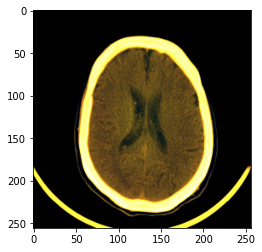

In [4]:
dcm = pydicom.dcmread('6.dcm')
dcm = bsb_window(dcm)
plt.imshow(dcm,cmap=plt.cm.bone)

In [5]:
dcm.dtype

dtype('uint8')

In [6]:
dcm = pydicom.dcmread('6.dcm')

In [7]:
brain_img = window_image(dcm, 40, 80)
subdural_img = window_image(dcm, 80, 200)
soft_img = window_image(dcm, 600, 2800)
    
brain_img = (brain_img - 0) / 80
subdural_img = (subdural_img - (-20)) / 200
soft_img = (soft_img - (-150)) / 380
    

brain_img = to_int(brain_img)
brain_img = resize(brain_img)
    
subdural_img = to_int(subdural_img)
subdural_img = resize(subdural_img)
    
soft_img = to_int(soft_img)
soft_img = resize(soft_img)

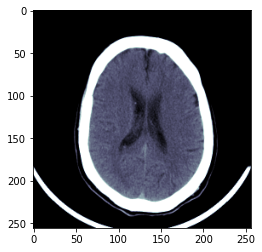

In [8]:
plt.imshow(brain_img, cmap=plt.cm.bone)

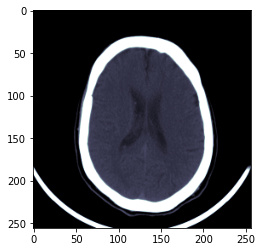

In [9]:
plt.imshow(subdural_img, cmap=plt.cm.bone)

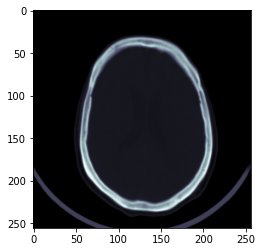

In [10]:
plt.imshow(soft_img, cmap=plt.cm.bone)

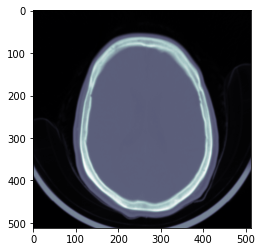

In [12]:
dcm = pydicom.dcmread('6.dcm')
plt.imshow(dcm.pixel_array,cmap=plt.cm.bone)

In [13]:
dcm

Dataset.file_meta -------------------------------
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 10000000106027
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.3.4
(0002, 0013) Implementation Version Name         SH: 'RSNA Challenge 2019'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: ID_0000f1657
(0008, 0060) Modality                            CS: 'CT'
(0010, 0020) Patient ID                          LO: 'ID_df70c823'
(0020, 000d) Study Instance UID                  UI: ID_04ef429610
(0020, 000e) Series Instance UID                 UI: ID_245e16180c
(0020, 0010) Study ID                            SH: ''
(0020, 0032) Image Position (Patient)            DS: [-115, -11, 367]
(0020, 0037) Image Orientation (Patient)         DS: [1, 0, 0, 0, 1, 0]
(0028, 0002) Samples per